In [236]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [248]:
bus_count_df = pd.read_excel("C:/Users/ghdtk/BigData/Project/Data/차종별 교통사고/버스 등록대수.xls", header = 1)
bus_count_df
taxi_count_df = pd.read_excel("C:/Users/ghdtk/BigData/Project/Data/차종별 교통사고/택시대수 및 운전자 현황(2019.12).xls", header = 3)
bt_accident_df = pd.read_csv("C:/Users/ghdtk/BigData/Project/Data/차종별 교통사고/도로교통공단_가해운전자 차량용도별 월별 교통사고 통계_20191231.csv", encoding = "ANSI")


In [249]:
taxi_x = ['일반택시', '개인택시']
taxi_count = [taxi_count_df.iloc[40, 9], taxi_count_df.iloc[40, 16]]

In [250]:
bus_x = ['시내버스', '시외버스', '고속버스', '마을버스']
bus_count = [bus_count_df.iloc[1]['보유대수'], bus_count_df.iloc[4]['보유대수'], bus_count_df.iloc[5]['보유대수'], bus_count_df.iloc[3]['보유대수']]

In [251]:
시내버스_accident_month = []
시외버스_accident_month = []
고속버스_accident_month = []
마을버스_accident_month = []
일반택시_accident_month = []
개인택시_accident_month = []

시내버스_death_month = []
시외버스_death_month = []
고속버스_death_month = []
마을버스_death_month = []
일반택시_death_month = []
개인택시_death_month = []
    
시내버스_injury_month = []
시외버스_injury_month = []
고속버스_injury_month = []
마을버스_injury_month = []
일반택시_injury_month = []
개인택시_injury_month = []

for i in range(12):
    시내버스_accident_month.append(int(bt_accident_df.iloc[i,4]))
    시외버스_accident_month.append(int(bt_accident_df.iloc[i+12,4]))
    고속버스_accident_month.append(int(bt_accident_df.iloc[i+24,4]))
    마을버스_accident_month.append(int(bt_accident_df.iloc[i+36,4]))
    일반택시_accident_month.append(int(bt_accident_df.iloc[i+65,4]))
    개인택시_accident_month.append(int(bt_accident_df.iloc[i+77,4]))
    
    시내버스_death_month.append(bt_accident_df.iloc[i,5])
    시외버스_death_month.append(bt_accident_df.iloc[i+12,5])
    고속버스_death_month.append(bt_accident_df.iloc[i+24,5])
    마을버스_death_month.append(bt_accident_df.iloc[i+36,5])
    일반택시_death_month.append(bt_accident_df.iloc[i+65,5])
    개인택시_death_month.append(bt_accident_df.iloc[i+77,5])
    
    시내버스_injury_month.append(bt_accident_df.iloc[i,6] + bt_accident_df.iloc[i,7])
    시외버스_injury_month.append(bt_accident_df.iloc[i+12,6] + bt_accident_df.iloc[i+12,7])
    고속버스_injury_month.append(bt_accident_df.iloc[i+24,6] + bt_accident_df.iloc[i+24,7])
    마을버스_injury_month.append(bt_accident_df.iloc[i+36,6] + bt_accident_df.iloc[i+36,7])
    일반택시_injury_month.append(bt_accident_df.iloc[i+65,6] + bt_accident_df.iloc[i+65,7])
    개인택시_injury_month.append(bt_accident_df.iloc[i+77,6] + bt_accident_df.iloc[i+77,7])


In [254]:
car_accident_df = pd.read_excel("C:/Users/ghdtk/BigData/Project/Data/차종별 교통사고/차종별 교통사고.xls", header = 1)
car_count_df = pd.read_csv("C:/Users/ghdtk/BigData/Project/Data/차종별 교통사고/차량 등록수.csv", encoding = 'ANSI')
car_accident_df


,가해운전자 차종별,사고년도,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,합계,사고건수,229600.0,16552.0,14752.0,18133.0,19104.0,20779.0,18968.0,19234.0,19992.0,19331.0,21690.0,21517.0,19548.0
1,합계,사망자수,3349.0,296.0,203.0,252.0,286.0,305.0,279.0,241.0,253.0,287.0,337.0,297.0,313.0
2,합계,부상자수,341712.0,24269.0,22612.0,26908.0,28438.0,31077.0,28315.0,28353.0,30358.0,28746.0,32050.0,31623.0,28963.0
3,승용차,사고건수,151365.0,11270.0,10185.0,12163.0,12597.0,13388.0,12252.0,12486.0,12892.0,12628.0,14037.0,14260.0,13207.0
4,승용차,사망자수,1571.0,157.0,116.0,115.0,131.0,145.0,117.0,97.0,119.0,126.0,160.0,144.0,144.0
5,승용차,부상자수,232408.0,17063.0,16149.0,18608.0,19252.0,20775.0,18922.0,19176.0,20172.0,19404.0,21366.0,21422.0,20099.0
6,승합차,사고건수,14221.0,1008.0,859.0,1168.0,1189.0,1285.0,1150.0,1164.0,1259.0,1210.0,1400.0,1302.0,1227.0
7,승합차,사망자수,209.0,15.0,12.0,11.0,21.0,17.0,18.0,21.0,11.0,22.0,19.0,19.0,23.0
8,승합차,부상자수,22675.0,1584.0,1387.0,1794.0,1937.0,2001.0,1818.0,1710.0,2071.0,1985.0,2295.0,2103.0,1990.0
9,화물차,사고건수,28788.0,2165.0,1797.0,2285.0,2430.0,2636.0,2357.0,2403.0,2497.0,2356.0,2801.0,2614.0,2447.0


In [255]:
car_x = ['승용차', '승합차', '화물차', '특수차']
car_count_group = car_count_df.groupby("레벨01").sum()
car_count = [car_count_group.iloc[0, 1], car_count_group.iloc[1, 1], car_count_group.iloc[3, 1], car_count_group.iloc[4, 1]]
car_count

[38355034, 1623598, 190928, 7185172]

In [256]:
승용차_accident_month = []
승합차_accident_month = []
화물차_accident_month = []
특수차_accident_month = []

승용차_death_month = []
승합차_death_month = []
화물차_death_month = []
특수차_death_month = []

승용차_injury_month = []
승합차_injury_month = []
화물차_injury_month = []
특수차_injury_month = []

for i in range(12):
    승용차_accident_month.append(car_accident_df.iloc[3, 3+i])
    승합차_accident_month.append(car_accident_df.iloc[6, 3+i])
    화물차_accident_month.append(car_accident_df.iloc[9, 3+i])
    특수차_accident_month.append(car_accident_df.iloc[12, 3+i])
    
    승용차_death_month.append(car_accident_df.iloc[4, 3+i])
    승합차_death_month.append(car_accident_df.iloc[7, 3+i])
    화물차_death_month.append(car_accident_df.iloc[10, 3+i])
    특수차_death_month.append(car_accident_df.iloc[13, 3+i])
    
    승용차_injury_month.append(car_accident_df.iloc[5, 3+i])
    승합차_injury_month.append(car_accident_df.iloc[8, 3+i])
    화물차_injury_month.append(car_accident_df.iloc[11, 3+i])
    특수차_injury_month.append(car_accident_df.iloc[14, 3+i])


In [257]:
car_x.extend(bus_x)
car_x.extend(taxi_x)
car_x

['승용차', '승합차', '화물차', '특수차', '시내버스', '시외버스', '고속버스', '마을버스', '일반택시', '개인택시']

In [258]:
car_count.extend(bus_count)
car_count.extend(taxi_count)
car_count
pd.DataFrame(car_count, index = car_x, columns = ['등록대수'])

,등록대수
승용차,38355034
승합차,1623598
화물차,190928
특수차,7185172
시내버스,34608
시외버스,8305
고속버스,1874
마을버스,5032
일반택시,79287
개인택시,164625


In [261]:
car_accident_df = pd.DataFrame(columns = ['월', '차종', '사고발생수', '사망자수', '부상자수', '사고발생률', '사망률'])
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차'], '사고발생수' : 승용차_accident_month, '사망자수' : 승용차_death_month, '부상자수' : 승용차_injury_month, '사고발생률' : np.array(승용차_accident_month) / car_count[0], '사망률' : np.array(승용차_death_month) / (np.array(승용차_death_month) + np.array(승용차_injury_month))}))
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차'], '사고발생수' : 승합차_accident_month, '사망자수' : 승합차_death_month, '부상자수' : 승합차_injury_month, '사고발생률' : np.array(승합차_accident_month) / car_count[1], '사망률' : np.array(승합차_death_month) / (np.array(승합차_death_month) + np.array(승합차_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차'], '사고발생수' : 화물차_accident_month, '사망자수' : 화물차_death_month, '부상자수' : 화물차_injury_month, '사고발생률' : np.array(화물차_accident_month) / car_count[2], '사망률' : np.array(화물차_death_month) / (np.array(화물차_death_month) + np.array(화물차_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차'], '사고발생수' : 특수차_accident_month, '사망자수' : 특수차_death_month, '부상자수' : 특수차_injury_month, '사고발생률' : np.array(특수차_accident_month) / car_count[3], '사망률' : np.array(특수차_death_month) / (np.array(특수차_death_month) + np.array(특수차_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스'], '사고발생수' : 시내버스_accident_month, '사망자수' : 시내버스_death_month, '부상자수' : 시내버스_injury_month, '사고발생률' : np.array(시내버스_accident_month) / car_count[4], '사망률' : np.array(시내버스_death_month) / (np.array(시내버스_death_month) + np.array(시내버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스'], '사고발생수' : 시외버스_accident_month, '사망자수' : 시외버스_death_month, '부상자수' : 시외버스_injury_month, '사고발생률' : np.array(시외버스_accident_month) / car_count[5], '사망률' : np.array(시외버스_death_month) / (np.array(시외버스_death_month) + np.array(시외버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스'], '사고발생수' : 고속버스_accident_month, '사망자수' : 고속버스_death_month, '부상자수' : 고속버스_injury_month, '사고발생률' : np.array(고속버스_accident_month) / car_count[6], '사망률' : np.array(고속버스_death_month) / (np.array(고속버스_death_month) + np.array(고속버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스'], '사고발생수' : 마을버스_accident_month, '사망자수' : 마을버스_death_month, '부상자수' : 마을버스_injury_month, '사고발생률' : np.array(마을버스_accident_month) / car_count[7], '사망률' : np.array(마을버스_death_month) / (np.array(마을버스_death_month) + np.array(마을버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시'], '사고발생수' : 일반택시_accident_month, '사망자수' : 일반택시_death_month, '부상자수' : 일반택시_injury_month, '사고발생률' : np.array(일반택시_accident_month) / car_count[8], '사망률' : np.array(일반택시_death_month) / (np.array(일반택시_death_month) + np.array(일반택시_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시'], '사고발생수' : 개인택시_accident_month, '사망자수' : 개인택시_death_month, '부상자수' : 개인택시_injury_month, '사고발생률' : np.array(개인택시_accident_month) / car_count[9], '사망률' : np.array(개인택시_death_month) / (np.array(개인택시_death_month) + np.array(개인택시_injury_month))}), ignore_index = True)


,월,차종,사고발생수,사망자수,부상자수,사고발생률,사망률
0,1,승용차,11270.0,157.0,17063.0,0.000294,0.009117
1,2,승용차,10185.0,116.0,16149.0,0.000266,0.007132
2,3,승용차,12163.0,115.0,18608.0,0.000317,0.006142
3,4,승용차,12597.0,131.0,19252.0,0.000328,0.006758
4,5,승용차,13388.0,145.0,20775.0,0.000349,0.006931
...,...,...,...,...,...,...,...
115,8,개인택시,567.0,3.0,759.0,0.003444,0.003937
116,9,개인택시,538.0,7.0,746.0,0.003268,0.009296
117,10,개인택시,579.0,8.0,772.0,0.003517,0.010256
118,11,개인택시,584.0,6.0,767.0,0.003547,0.007762


In [263]:
model = ols('사고발생률~차종', car_accident_df).fit()

print (anova_lm(model))

             df    sum_sq   mean_sq          F        PR(>F)
차종          9.0  0.004785  0.000532  258.65132  1.019886e-69
Residual  110.0  0.000226  0.000002        NaN           NaN


In [265]:
model=ols('사망률~차종', car_accident_df).fit()

print (anova_lm(model))

             df    sum_sq   mean_sq         F        PR(>F)
차종          9.0  0.003122  0.000347  6.107656  6.179533e-07
Residual  110.0  0.006248  0.000057       NaN           NaN


In [269]:
accident_rate = car_accident_df.groupby("차종").사고발생률.mean()

In [271]:
death_rate = car_accident_df.groupby("차종").사망률.mean()

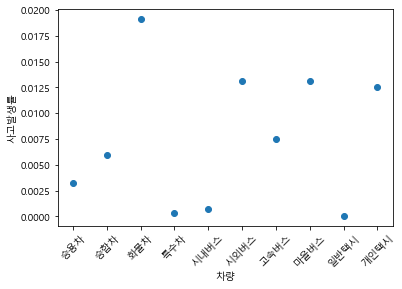

In [286]:
plt.xticks(rotation = 45)
plt.xlabel("차량")
plt.ylabel("사고발생률")
plt.scatter(x = car_x, y = accident_rate)

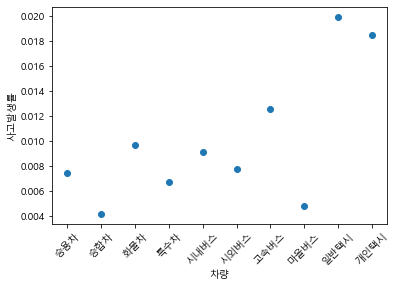

In [287]:
plt.xticks(rotation = 45)
plt.xlabel("차량")
plt.ylabel("사고발생률")
plt.scatter(x = car_x, y = death_rate)